## Model Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [4]:
y = df["Salary"]

In [5]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [6]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [10]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [11]:
lm = LinearRegression()

In [12]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [13]:
y_pred = pcr_model.predict(X_reduced_train)

In [14]:
pca2 = PCA()

In [15]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [16]:
y_pred = pcr_model.predict(X_reduced_test)

In [17]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

409.80079651476245


In [18]:
from sklearn import model_selection

In [19]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [20]:
lm = LinearRegression()

In [21]:
RMSE = []

In [23]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

C:\Users\Harun\AppData\Local\Temp\ipykernel_41696\2668770521.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Harun\AppData\Local\Temp\ipykernel_41696\2668770521.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Harun\AppData\Local\Temp\ipykernel_41696\2668770521.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\Harun\AppData\Local\Temp\ipykernel_41696\2668770521.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel

In [24]:
import matplotlib.pyplot as plt

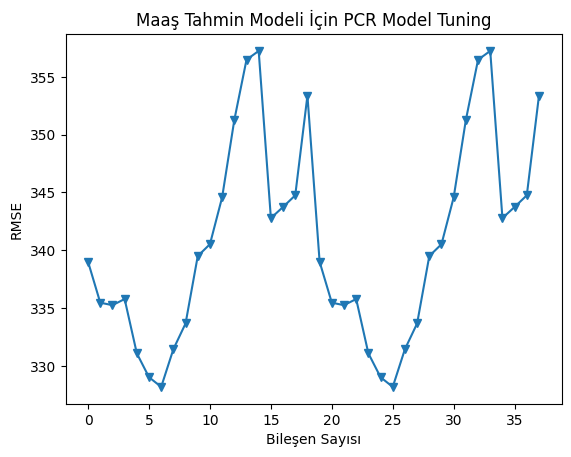

In [25]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [26]:
lm = LinearRegression()

In [27]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [28]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [29]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [30]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [31]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

407.20007134038366
